# Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [3]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add project root to Python path
sys.path.append(os.path.abspath(".."))

try:
    from Scripts.preprocessing import ReviewPreprocessor
    from Scripts.scraper import main as run_scraper
    print("✅ Successfully imported modules from Scripts!")
except Exception as e:
    print("❌ Failed to import modules:", e)


✅ Successfully imported modules from Scripts!


In [4]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...

Starting Google Play Review Scraper

[1/2] Fetching app info...
App info saved.

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


🔍 Scraping reviews for Commercial Bank of Ethiopia...
Total raw reviews fetched: 8120
✅ Collected 400 meaningful English reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:15<00:31, 15.87s/it]


🔍 Scraping reviews for Dashen Bank...
Total raw reviews fetched: 764
✅ Collected 400 meaningful English reviews for Dashen Bank


Banks:  67%|██████▋   | 2/3 [00:25<00:12, 12.38s/it]


🔍 Scraping reviews for Abyssinia...
Total raw reviews fetched: 1184
✅ Collected 400 meaningful English reviews for Abyssinia


Banks: 100%|██████████| 3/3 [00:33<00:00, 11.05s/it]


Scraping Completed!
Total English reviews collected: 1200


Sample Reviews

Commercial Bank of Ethiopia
------------------------------------------------------------

⭐ Rating: 5
Review: good app...
Date: 2025-11-28 11:33:17

⭐ Rating: 5
Review: This application is very important and advantage for transfer of money and finance in the coutry and foriegn country....
Date: 2025-11-27 23:08:20

⭐ Rating: 1
Review: why didn't work this app?...
Date: 2025-11-27 22:40:35

Dashen Bank
------------------------------------------------------------

⭐ Rating: 5
Review: its fast and easy to communicate to the app and its available all area keep it up.i will make Happy for this application thank you dashen bank for your effort,commitment and dedication. i appricated y...
Date: 2025-11-26 18:02:58

⭐ Rating: 1
Review: What do you care about my phone's settings? Who are you to tell me what to turn off and on? It is my phone after all. This *develoler option* thing will cost you a lot of users who are 

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_version,source
0,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,A Google user,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
1,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,A Google user,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
2,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27 22:40:35,A Google user,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
3,c69f051a-00f8-4144-8423-b7ebcd328d2d,The app makes our life easier. Thank you CBE!,5,2025-11-27 18:00:06,A Google user,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
4,d2995fb9-63c6-4bfc-8d3c-93a0ee9dba8f,this app very bad,1,2025-11-27 16:28:10,A Google user,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [5]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_version: 220 (18.33%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-05-11 to 2025-11-28

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1200 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1200

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Abyssinia: 400
  Commercial Bank of Ethiopia: 400
  Dashen Bank: 400

Rating distribution:
  ⭐⭐⭐⭐⭐: 601 (50.1%)
  ⭐⭐⭐⭐: 80 (6.7%)
  ⭐⭐⭐: 75 (6.2%)
  ⭐⭐: 60 (5.0%)
  ⭐: 384 (32.0%)

Date range: 2024-05-11 to 2025-11-28

Text statisti

In [6]:
print("df in globals():", 'df' in globals())
print("df type:", type(df))
print("df shape:", df.shape)


df in globals(): True
df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1200, 12)


## 3. Visualizations

Let's explore the cleaned data.

C:\Users\Birhanu Matebe\AppData\Local\Temp\ipykernel_18760\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\Birhanu Matebe\AppData\Local\Temp\ipykernel_18760\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


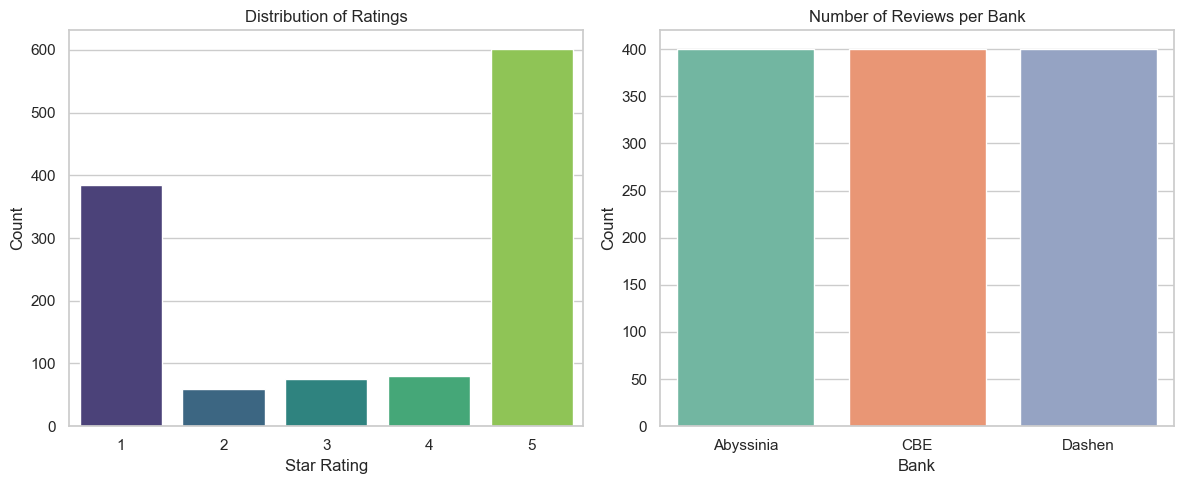

In [7]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

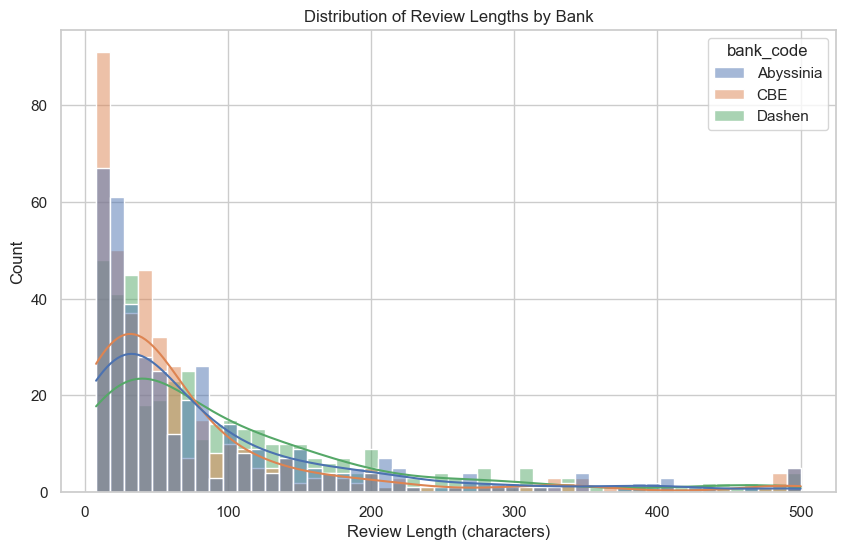

In [8]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()